In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show 
from bokeh.plotting import figure
from bokeh.models import HoverTool,ColumnDataSource

In [2]:
dt_qzvvpp=pd.read_pickle('data_def2_qzvpp')
dt_tzvp=pd.read_pickle('data_def2_tzvp')
dt_qzvvpp=pd.read_pickle('data_def2_qzvpp')
dt_tzvp=pd.read_pickle('data_def2_tzvp')


In [13]:
cutoff = 3.2
dfp=dt_qzvvpp.query("distance < @cutoff ").copy()

p = figure(title="Def2-QZVPP",plot_width=1800, plot_height=1000)
alcolor={0:'purple',1:'blue',2:'green',3:'black',4:'red'}
def alcol(ao):
    return alcolor[ao]
Alcol=[alcol(x) for x in list(dfp.alchemy)]
dfp['alcol']=Alcol
drdV=[]
#dfp['err_alch']=np.abs(dfp['err_alch'])
source = ColumnDataSource(dfp)
p.cross('delta_rho', 'err_alch', source=source,color='alcol')
#p.line(dfp.delta_rho)
hover = HoverTool()
hover.tooltips = [("Reference","@ref"), ("Target", "@target"),("Distance",'@distance'),\
                  ('Alchemy','@alchemy'),('Alchemy error','@err_alch')]#,('Total error','@tot_err')]
hover.mode = 'mouse'
p.add_tools(hover)
p.xaxis.axis_label = 'delta_Rho'
p.yaxis.axis_label = 'Alchemy error'
show(p)

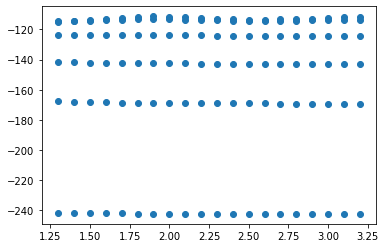

In [18]:
plt.scatter(dt_qzvvpp.query("alchemy==2 & ref=='HeMg'").distance,dt_qzvvpp.query("alchemy==2 & ref=='HeMg'").e_alch)

In [68]:
def plot(ax,dfp):
    dfp['err_alch']=np.abs(dfp['err_alch'])
    dfp['delta_rho_double']=np.asarray((dfp.delta_rho),dtype=int)
    dfp=dfp.sort_values(by='delta_rho')

    for name, group in dfp.groupby('alchemy'):
        x_pl=[]
        y_pl=[]
        for name2,group2 in group.groupby('delta_rho_double'):
            x_pl.append(name2)
            y_pl.append(group2.err_alch.median())
        ax.plot(x_pl,y_pl,label=name)
        #ax.scatter(group.delta_rho,group.err_alch, color='C%d' % int(name), s=2) 
    ax.set_yscale('log')

    plt.subplots_adjust(hspace=0,wspace=0)
    ax.legend(loc='best')


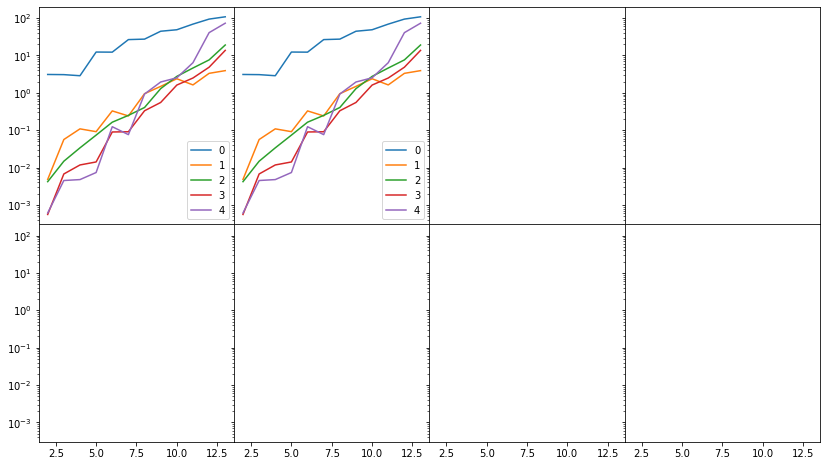

In [71]:
fig= plt.figure(figsize=(14,8))
axs = fig.subplots(2, 4,sharex=True, sharey=True)
ax = axs[0, 0]
dfp=dt_qzvvpp.copy()
plot(ax,dfp)
plot(axs[0,1],dfp)


In [31]:
int(np.array([1.2,2.3]))

TypeError: only size-1 arrays can be converted to Python scalars

In [6]:
"""for ref in ['HAl','HeMg','LiNa','BeNe','BF','CO','NN']:
    fig=plt.figure(figsize=(12,8))
    dfp=dt_tzvp[dt_qzvvpp.ref==ref][dt_qzvvpp.alchemy==2].copy()
    mean=np.abs(dfp.err_alch)
    plt.scatter(dfp.delta_rho,dfp.err_alch,label=ref)
    plt.legend()
    plt.show()
    """

"for ref in ['HAl','HeMg','LiNa','BeNe','BF','CO','NN']:\n    fig=plt.figure(figsize=(12,8))\n    dfp=dt_tzvp[dt_qzvvpp.ref==ref][dt_qzvvpp.alchemy==2].copy()\n    mean=np.abs(dfp.err_alch)\n    plt.scatter(dfp.delta_rho,dfp.err_alch,label=ref)\n    plt.legend()\n    plt.show()\n    "